<a href="https://colab.research.google.com/github/dvisionst/food_sales_predictions/blob/main/Project_1_food_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 Core
- Jose Flores
- 6/29/2022

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import random
sales_data = "/content/sales_predictions.csv"
df = pd.read_csv(sales_data)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Week 2 Tasks

## 1) How many rows and columns?

In [59]:
# 1) How many rows and columns?
df.info()

#Answer: There are a total of 8523 rows and 12 columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## 2) What are the datatypes of each variable?


In [60]:
### 2) What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

## 3) Are there duplicates? If so, drop any duplicates.

In [61]:
df.drop_duplicates()
len(df)
# no duplicates

8523

## 4) Identify missing values.

In [62]:
# 4) Identify missing values.

df.isna().sum()

# 1463 missing values for Item_weight, and 2410 for Outlet Size


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice)

I identified the missing values to be 1463 in the Item_Weight column and 2410 in the Outlet_Size column. I noticed that the Item_Identifier had multiple duplicates. This meant that the actual weight was recorded for some rows but not all. I decided to created some function in order to loop through the dataframe and find the missing values and replace them with the true weight. 

For the Outlet_Size I could not find any pattern or logic. I decided to fill in the null values with the word 'Missing.' This allowed me to identify the Missing values in a conditional statement in a loop. After some calculations I was able to determine the frequency percentages for the three sizes. They are as follows:
High 15.2%
Medium 45.7%
Small 39.1%
Knowing that I created a probabilty list with 10 values each approximating the percentage above. That list was constructed as such:
'High' 1 
'Medium' 5
'Small' 4
From there I created a function and made use of the random.choice using this weighted probabilty list.
I feel good and confident with my methods and the code is in the following block.

In [63]:
# In order to address the missing weight I needed two columns of info
# To start i created an item_df in order to convert to a dictionary I dropped
# all colums except for Identifier and Weight
item_df = df.drop(columns=['Item_Fat_Content',
                           'Item_Visibility', 'Item_Type',
                           'Item_MRP', 'Outlet_Identifier',
                           'Outlet_Establishment_Year',
                           'Outlet_Size', 'Outlet_Location_Type',
                           'Outlet_Type', 'Item_Outlet_Sales'])

# next two lines allow me to have just the unique values in the identifier col
item_df = item_df.sort_values('Item_Weight')
item_df.drop_duplicates(subset='Item_Identifier', keep='first', inplace=True)
# there were a handful of values with unique identifiers but no weight the code 
# belos removes those
item_df = item_df[~item_df['Item_Weight'].isna()]
# this line is using dictionary comprehension in order to turn the df
# that's been filtered to have unique identifiers paired with weights
item_dict = {row.Item_Identifier: row.Item_Weight for (index, row) in item_df.iterrows()}

# This line will allow me to use 0 in my loop to identify where to impute
# replacing null values with 'Missing'
df['Outlet_Size'].fillna('Missing', inplace=True)
df['Item_Weight'].fillna(0, inplace=True)


#This function uses the item dicitonary and the dataframe in order
# to loop through and replace the missing values with the weights
# it returns the updated dataframe
def filling_in_mass(mass_dict, dataframe):
    i = 0
    while i < len(dataframe):
        if dataframe.iloc[i]['Item_Weight'] == 0:
            mass = dataframe.iloc[i]['Item_Identifier']
            if mass not in mass_dict.keys():
                dataframe.drop(axis='index', index=i, inplace=True)
                i += 1
            elif mass in mass_dict.keys():
                dataframe.iat[i, dataframe.columns.get_loc('Item_Weight')] = mass_dict[mass]
                i += 1
        else:
            i += 1
    return dataframe


filling_in_mass(mass_dict=item_dict, dataframe=df) # calling the function
zeros = df['Item_Weight'] == 0
df.drop(axis='index', index=[1922, 4187, 5022], inplace=True) 

probability_list = ['High', 'Small', 'Small', 'Small', 'Small',
                    'Medium', 'Medium', 'Medium', 'Medium', 'Medium']


def filling_in_size(odds, dataframe):
    i = 0
    while i < len(dataframe):
        if dataframe.iloc[i]['Outlet_Size'] == 'Missing':
            dataframe.iat[i, dataframe.columns.get_loc('Outlet_Size')] = random.choice(odds)
            i += 1
        else:
            i += 1
    return dataframe


filling_in_size(odds=probability_list, dataframe=df) # calling the function
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 6) Confirm that there are no missing values after addressing them

In [64]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [65]:
df['Item_Fat_Content'].value_counts()
df.replace(to_replace=['LF', 'low fat'], value='Low Fat', inplace=True)
df.replace(to_replace='reg', value='Regular', inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5514
Regular    3002
Name: Item_Fat_Content, dtype: int64

## 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [66]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8516.000000,8516.000000,8516.000000,8516.000000,8516.000000
mean,12.877261,0.066106,141.000022,1997.836073,2181.298323
std,4.645880,0.051586,62.286516,8.369584,1706.559669
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026976,93.835050,1987.000000,834.580300
50%,12.650000,0.053923,143.031200,1999.000000,1794.331000
75%,16.850000,0.094554,185.668700,2004.000000,3100.297700
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Week 3 Tasks
## For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

## Histogram to view the distributions of various features in your dataset.

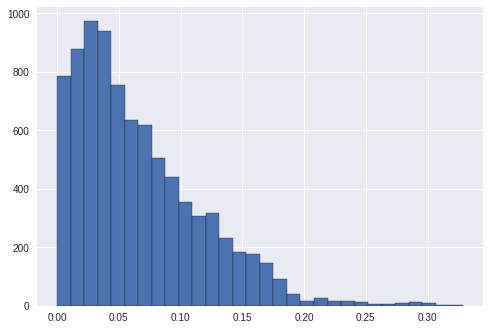

In [67]:
plt.style.use('seaborn')
df['Item_Visibility'].hist(bins=30, edgecolor='black');

# Item Visibility histogram shows a unimodal right skewed distribution
# This points to there being several data points that could be outliers 
# greater than the mode

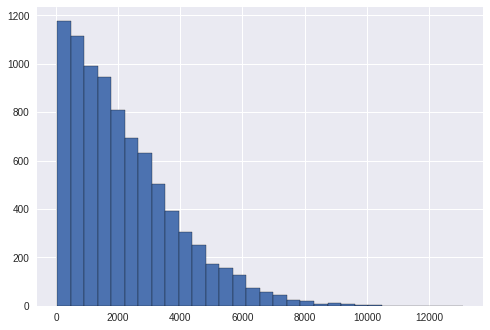

In [68]:
plt.style.use('seaborn')
df['Item_Outlet_Sales'].hist(bins=30, edgecolor='black');
# Item Outlet Sales just like the Item Visibility  histogram shows a 
# unimodal right skewed distribution. This points to there being several 
#data points that could be outliers greater than the mode

## Boxplot to view statistical summaries of various features in your dataset.

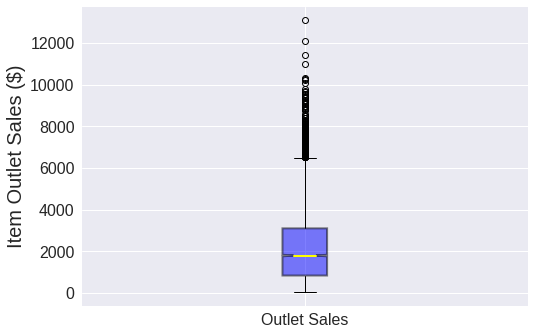

In [69]:
sales = df['Item_Outlet_Sales']
plt.boxplot([sales],
                        notch=True,
                        labels=['Outlet Sales'],
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('Item Outlet Sales ($)', fontsize = 20);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# This confirms the histogram being right skewed it shows several values as outliers

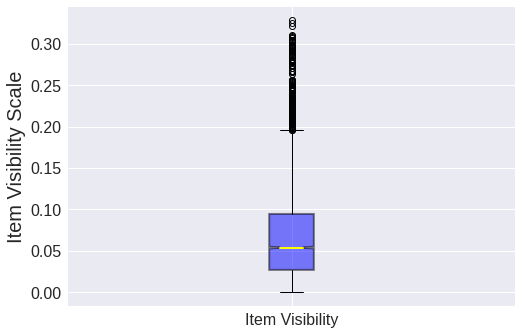

In [70]:
visibility = df['Item_Visibility']
plt.boxplot([visibility],
                        notch=True,
                        labels=['Item Visibility'],
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('Item Visibility Scale', fontsize = 20);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

# Just like the Item Outlet Sales boxplot, this Item Visibility boxplot confirms
# the earlier histogram being right skewed it shows several values as outliers

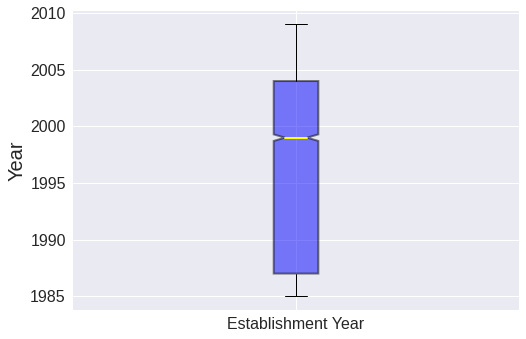

In [71]:
year = df['Outlet_Establishment_Year']
plt.boxplot([year],
                        notch=True,
                        labels=['Establishment Year'],
                        patch_artist=True,
                        widths=.1,
                        medianprops= dict(linestyle='-', linewidth=2, color='Yellow'),
                        boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .5)
                        );


plt.ylabel('Year', fontsize = 20);

plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);



## Heatmap of the correlation between features.

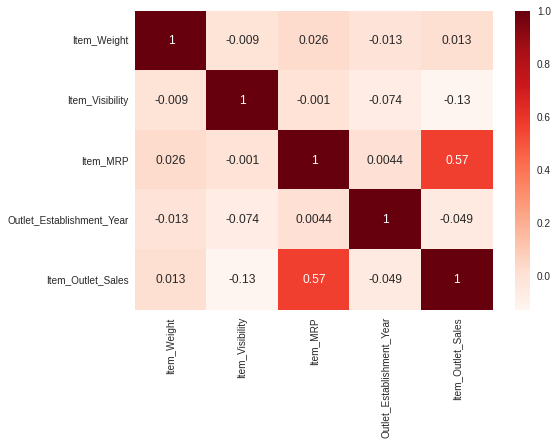

In [72]:
corr = df.corr()
sns.heatmap(corr, cmap="Reds", annot=True);

# The heatmap shows a positive correlation between Item MRP and Item Outlet 
# Sales. It also shows a very weak correlation between Item Visibility and
# Item MRP. None of the factors have a strong correlation as none are over |0.7|

## Scatter plot

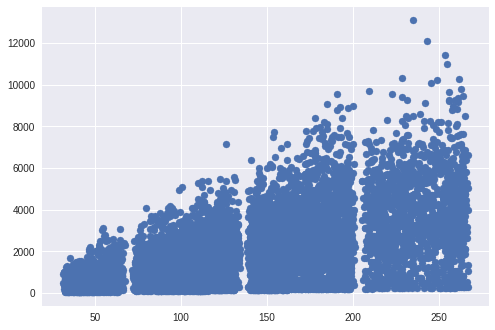

In [73]:
plt.scatter(x=df['Item_MRP'], y=df['Item_Outlet_Sales']);

# Week 4 Portion

For Part 4, your task is to build several data visualizations to help your stakeholders better understand trends in the data. Feel free to get creative with this week - this is your chance to set your project apart from others with exceptional visualizations and analyses.

Build on your previous cleaning, exploration, and analysis.  
Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).
Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.
Commit your work to GitHub. 

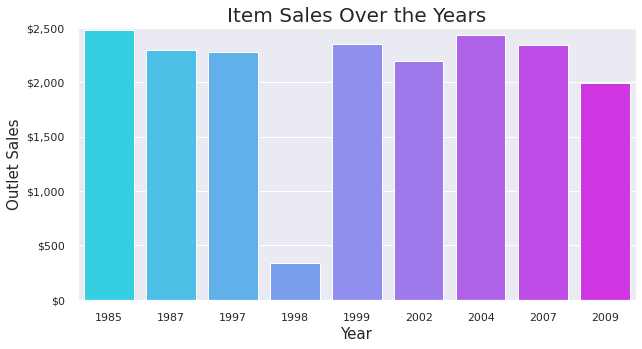

In [115]:

fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="darkgrid")
plt.xlim(1985, 2009)
plt.ylim(0,2500)
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)
plt.title("Item Sales Over the Years", fontdict={"fontsize": 20})
sns.barplot(x="Outlet_Establishment_Year",
             palette='cool',
             y="Item_Outlet_Sales", 
             data=df, ci=None);
plt.ylabel("Outlet Sales", size=15);
plt.xlabel("Year", size=15);

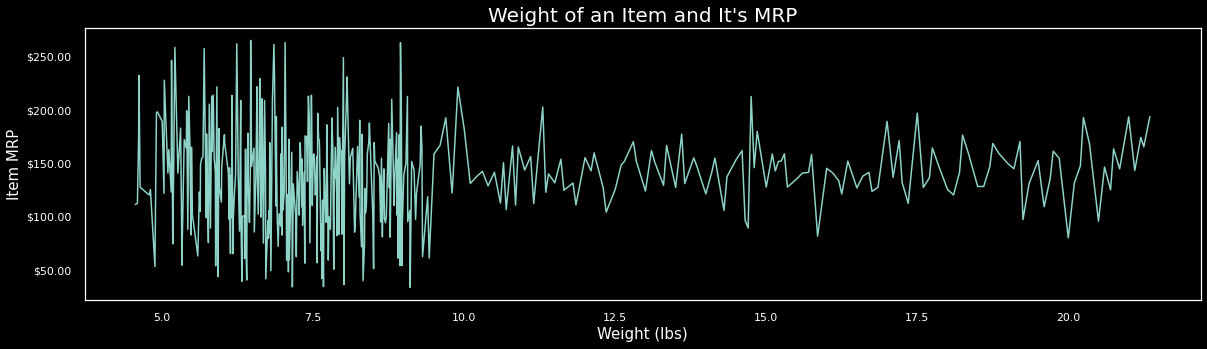

In [165]:
fig, ax = plt.subplots(figsize=(20,5))

# plt.xlim(0, 22)
# plt.ylim(0,2500)
price_fmt = mpl.ticker.StrMethodFormatter('${x:,.2f}')
ax.yaxis.set_major_formatter(price_fmt)
plt.title("Weight of an Item and It's MRP", fontdict={"fontsize": 20})
line = sns.lineplot(x="Item_Weight",
             y="Item_MRP", data=df, ci=None);
plt.ylabel("Item MRP", size=15);
plt.xlabel("Weight (lbs)", size=15);

plt.style.use(['dark_background']);

plt.rcParams['font.family'] = 'serif'